## To continue the analysis, we recall the hypothesis: "The highest proportion of attacks in the last century has taken place in the United States but the fatality level is lower than in the rest of the world".

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib as plt

In [2]:
final_attacks = pd.read_csv("../output/final_attacks_output.csv",encoding = "ISO-8859-1")

In [3]:
final_attacks[["Country","Fatal","Year", "Age"]].value_counts()

Country  Fatal  Year    Age
USA      N      2003.0  18     6
other    N      2006.0  15     5
                1964.0  19     4
USA      N      2001.0  16     4
                1995.0  19     4
                              ..
         Y      1933.0  24     1
                1926.0  18     1
                1924.0  35     1
                1922.0  18     1
other    Y      2018.0  18     1
Length: 2555, dtype: int64

In [4]:
hipothesis = final_attacks.groupby(["Country","Fatal","Year",])

In [5]:
hipothesis.describe()

Case Number                            Date         \
                           count unique           top freq count unique   
Country Fatal Year                                                        
USA     N     1900.0           4      4    1900.08.21    1     4      4   
              1901.0           1      1    1901.00.00    1     1      1   
              1902.0           2      2  1902.11.01.R    1     2      2   
              1903.0           1      1  1903.09.16.R    1     1      1   
              1904.0           1      1    1904.07.28    1     1      1   
...                          ...    ...           ...  ...   ...    ...   
other   Y     2014.0           7      7    2014.09.09    1     7      7   
              2015.0           8      8    2015.02.09    1     8      8   
              2016.0           5      5    2016.04.09    1     5      5   
              2017.0           8      8  2017.04.17.a    1     8      8   
              2018.0           1      1  2018.06.03.a    1     1      1   

                                                 Area         ...  Age       \
                                       top freq count unique  ...  top freq   
Country Fatal Year                                            ...             
USA     N     1900.0         Late Jul-1900    1     4      3  ...  NaN  NaN   
              1901.0           Summer 1901    1     1      1  ...  NaN  NaN   
              1902.0           06-Jul-1902    1     2      2  ...  NaN  NaN   
              1903.0  Reported 16-Sep-1903    1     1      1  ...  NaN  NaN   
              1904.0           28-Jul-1904    1     1      1  ...  NaN  NaN   
...                                    ...  ...   ...    ...  ...  ...  ...   
other   Y     2014.0           15-Dec-2014    1     7      6  ...   17    2   
              2015.0           14-Feb-2015    1     5      5  ...   46    1   
              2016.0           31-May-2016    1     5      4  ...   69    1   
              2017.0           17-Apr-2017    1     7      7  ...   22    1   
              2018.0           03-Jun-2018    1     1      1  ...   18    1   

                     Injury         \
                      count unique   
Country Fatal Year                   
USA     N     1900.0      4      4   
              1901.0      1      1   
              1902.0      2      2   
              1903.0      1      1   
              1904.0      1      1   
...                     ...    ...   
other   Y     2014.0      7      2   
              2015.0      8      1   
              2016.0      5      1   
              2017.0      8      2   
              2018.0      1      1   

                                                                              \
                                                                    top freq   
Country Fatal Year                                                             
USA     N     1900.0  No injury to occupants. They shot shark, then ...    1   
              1901.0                                     Abdomen bitten    1   
              1902.0                          Severe laceration to hand    1   
              1903.0                Lacerations to right arm & shoulder    1   
              1904.0                                          No injury    1   
...                                                                 ...  ...   
other   Y     2014.0                                              FATAL    6   
              2015.0                                              FATAL    8   
              2016.0                                              FATAL    5   
              2017.0                                              FATAL    7   
              2018.0                                              FATAL    1   

                     Species         \
                       count unique   
Country Fatal Year                    
USA     N     1900.0       0      0   
              1901.0       0      0   
              

In [6]:
hipothesis.describe()

Case Number                            Date         \
                           count unique           top freq count unique   
Country Fatal Year                                                        
USA     N     1900.0           4      4    1900.08.21    1     4      4   
              1901.0           1      1    1901.00.00    1     1      1   
              1902.0           2      2  1902.11.01.R    1     2      2   
              1903.0           1      1  1903.09.16.R    1     1      1   
              1904.0           1      1    1904.07.28    1     1      1   
...                          ...    ...           ...  ...   ...    ...   
other   Y     2014.0           7      7    2014.09.09    1     7      7   
              2015.0           8      8    2015.02.09    1     8      8   
              2016.0           5      5    2016.04.09    1     5      5   
              2017.0           8      8  2017.04.17.a    1     8      8   
              2018.0           1      1  2018.06.03.a    1     1      1   

                                                 Area         ...  Age       \
                                       top freq count unique  ...  top freq   
Country Fatal Year                                            ...             
USA     N     1900.0         Late Jul-1900    1     4      3  ...  NaN  NaN   
              1901.0           Summer 1901    1     1      1  ...  NaN  NaN   
              1902.0           06-Jul-1902    1     2      2  ...  NaN  NaN   
              1903.0  Reported 16-Sep-1903    1     1      1  ...  NaN  NaN   
              1904.0           28-Jul-1904    1     1      1  ...  NaN  NaN   
...                                    ...  ...   ...    ...  ...  ...  ...   
other   Y     2014.0           15-Dec-2014    1     7      6  ...   17    2   
              2015.0           14-Feb-2015    1     5      5  ...   46    1   
              2016.0           31-May-2016    1     5      4  ...   69    1   
              2017.0           17-Apr-2017    1     7      7  ...   22    1   
              2018.0           03-Jun-2018    1     1      1  ...   18    1   

                     Injury         \
                      count unique   
Country Fatal Year                   
USA     N     1900.0      4      4   
              1901.0      1      1   
              1902.0      2      2   
              1903.0      1      1   
              1904.0      1      1   
...                     ...    ...   
other   Y     2014.0      7      2   
              2015.0      8      1   
              2016.0      5      1   
              2017.0      8      2   
              2018.0      1      1   

                                                                              \
                                                                    top freq   
Country Fatal Year                                                             
USA     N     1900.0  No injury to occupants. They shot shark, then ...    1   
              1901.0                                     Abdomen bitten    1   
              1902.0                          Severe laceration to hand    1   
              1903.0                Lacerations to right arm & shoulder    1   
              1904.0                                          No injury    1   
...                                                                 ...  ...   
other   Y     2014.0                                              FATAL    6   
              2015.0                                              FATAL    8   
              2016.0                                              FATAL    5   
              2017.0                                              FATAL    7   
              2018.0                                              FATAL    1   

                     Species         \
                       count unique   
Country Fatal Year                    
USA     N     1900.0       0      0   
              1901.0       0      0   
              

### Distrubution of attacks in the USA

In [7]:
# To filter only data in Country when value is "USA"

USA = final_attacks.loc[: , 'Country'] == 'USA'
USA_attacks = final_attacks.loc[USA]

In [8]:
# To filter only data in Country when value is "other"

other = final_attacks.loc[: , 'Country'] == 'other'
rest_attacks = final_attacks.loc[other]

## Analysis visualization

In [9]:
hipothesis = final_attacks.groupby(["Country","Fatal","Year", "Age"])

#### Graph 1: Probability of a shark attack taking place in the USA. 

<AxesSubplot:xlabel='Country', ylabel='Probability'>

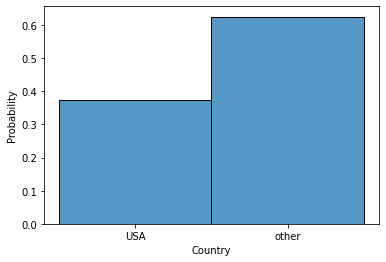

In [10]:
sns.histplot(data = final_attacks, x = "Country", stat = "probability", discrete = True)

At very first sight, the first graph shows that approximately 40% of attacks take place in the USA.

#### Graph 2: Distribution of fatal attacks between the USA and the rest of the world.

<AxesSubplot:xlabel='Country', ylabel='count'>

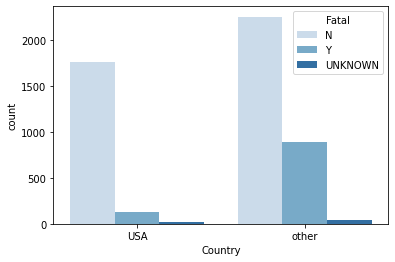

In [11]:
sns.countplot(x = final_attacks.Country, hue = final_attacks.Fatal, palette="Blues")

Additionally, the second graph shows that most of the fatalities take place outside the US.

#### Grpahs 3 & 4: Density distribution of fatal attacks in the US.

#### Graph 3: Density distribution of fatal attacks in the US 

<AxesSubplot:xlabel='Year', ylabel='Density'>

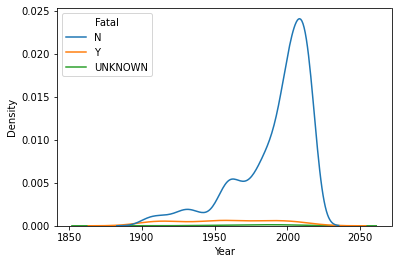

In [12]:
sns.kdeplot(x = USA_attacks.Year, hue = final_attacks.Fatal)

#### Graph 4: Historam distribution of fatal attacks in the US.

<AxesSubplot:xlabel='Year', ylabel='Count'>

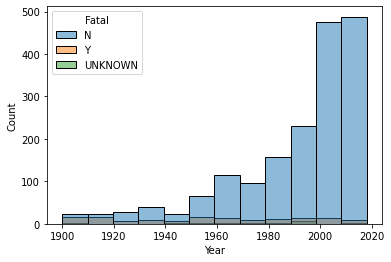

In [13]:
sns.histplot(x = USA_attacks.Year, hue = USA_attacks.Fatal, bins = 12)

In the graph above we can see how the attacks in the USA distributed on a decade basis.

#### Graph 5: Density distribution of fatal attacks in the rest of the world 


<AxesSubplot:xlabel='Year', ylabel='Density'>

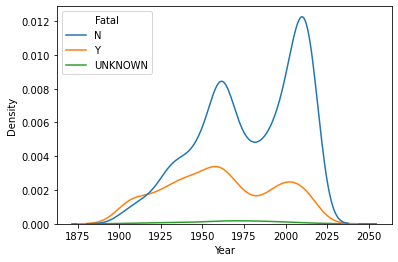

In [14]:
sns.kdeplot(x = rest_attacks.Year, hue = final_attacks.Fatal)

#### Graph 6: Histogram distribution of fatal attacks in the rest of the world.

<AxesSubplot:xlabel='Year', ylabel='Count'>

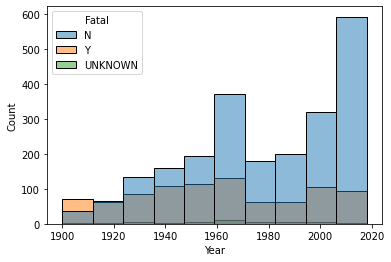

In [15]:
sns.histplot(x = rest_attacks.Year, hue = rest_attacks.Fatal, bins = 10)

In the graph above we can see how the attacks in the USA distributed on a decade basis.

#### Figures 3&4 and 5&6 conclusions

- Figures 3&4 shows that despite an increase in the number of attacks in the USA, the majority of attacks do not result in death.

- Figures 5&6 shows that in the rest of the world, as shark attacks increase, the number of deaths caused by sharks also increases.

However, we can see how this trend changes, increasing the number of attacks that do not end in fatality with respect to those that do.

## Conclusion

The hypothesis: "The highest proportion of attacks in the last century has taken place in the United States but the fatality level is lower than in the rest of the world" is true.